In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#https://www.kaggle.com/datasets/gunjansanjaykadam/brainnn/data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = datagen.flow_from_directory(
    '/kaggle/input/brainnn/Training/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/kaggle/input/brainnn/Testing/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2333 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.6972 - loss: 1.7971 - val_accuracy: 0.6950 - val_loss: 0.9276
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.8991 - loss: 0.2648 - val_accuracy: 0.7518 - val_loss: 0.4395
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.8707 - loss: 0.3095 - val_accuracy: 0.7021 - val_loss: 0.7918
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.8962 - loss: 0.2447 - val_accuracy: 0.7518 - val_loss: 0.6875
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.9020 - loss: 0.2229 - val_accuracy: 0.7872 - val_loss: 0.4486
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9267 - loss: 0.1858 - val_accuracy: 0.7660 - val_loss: 0.4529
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.9314 - loss: 0.1826 - val_accuracy: 0.8085 - val_loss: 0.3789
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9033 - loss: 0.2295 - val_accuracy: 0.8014 - val_loss: 0.

In [ ]:

val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8335 - loss: 0.3199
Validation Accuracy: 0.83


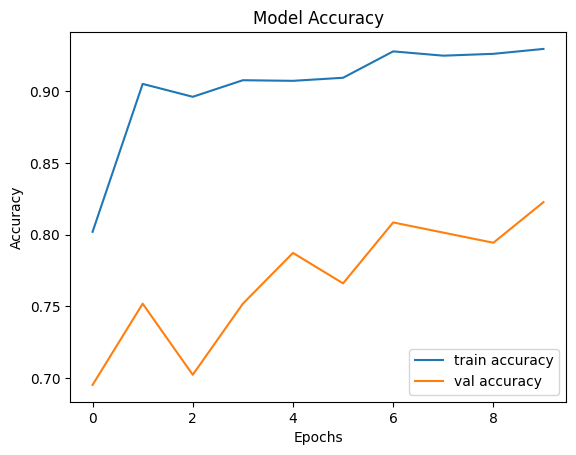

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


img = image.load_img('/kaggle/input/brainnn/Testing/glioma/Te-glTr_0000.jpg', target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)
risk = 'Disease' if prediction[0] > 0.5 else 'No Disease'
print(f"Predicted Risk: {risk}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Risk: Disease


In [ ]:

for layer in base_model.layers[:-30]:
    layer.trainable = False


model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)


Epoch 1/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 295s 4s/step - accuracy: 0.8183 - loss: 1.9271 - val_accuracy: 0.5745 - val_loss: 2.0214
Epoch 2/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.8974 - loss: 0.3910 - val_accuracy: 0.8014 - val_loss: 0.4329
Epoch 3/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.9502 - loss: 0.1345 - val_accuracy: 0.7589 - val_loss: 0.4814


In [ ]:
from sklearn.metrics import classification_report
import numpy as np


y_true = validation_generator.classes


y_pred_prob = model.predict(validation_generator)
y_pred = np.where(y_pred_prob > 0.5, 1, 0).reshape(-1)

print(classification_report(y_true, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
              precision    recall  f1-score   support

           0       0.49      0.28      0.36        60
           1       0.59      0.78      0.67        81

    accuracy                           0.57       141
   macro avg       0.54      0.53      0.52       141
weighted avg       0.55      0.57      0.54       141



Here, the probability marks more than 0.5 and hence prediction is disease(done in previous steps)